<a href="https://colab.research.google.com/github/FrederDoll/PyDeep/blob/main/BeamEquations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#get the Beam equations running with SciANN

Installing SCIANN.



This Paper Intrdoduces SciANN: 
https://arxiv.org/abs/2005.08803





In [1]:
!pip install sciann 

In [2]:
# You need to have tensorflow, keras, and sciann installed in your system. 

import numpy as np
import matplotlib.pyplot as plt 
import sciann as sn 
from numpy import pi
from sciann.utils.math import diff, sign, sin


---------------------- SCIANN 0.6.6.1 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://www.sciencedirect.com/science/article/pii/S0045782520307374", 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 

 Need support or would like to contribute, please join sciann`s slack group: 
 +  "https://join.slack.com/t/sciann/shared_invite/zt-ne1f5jlx-k_dY8RGo3ZreDXwz0f~CeA" 
 
TensorFlow Version: 2.5.3 
Python Version: 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0] 



# Beam Equations
    
 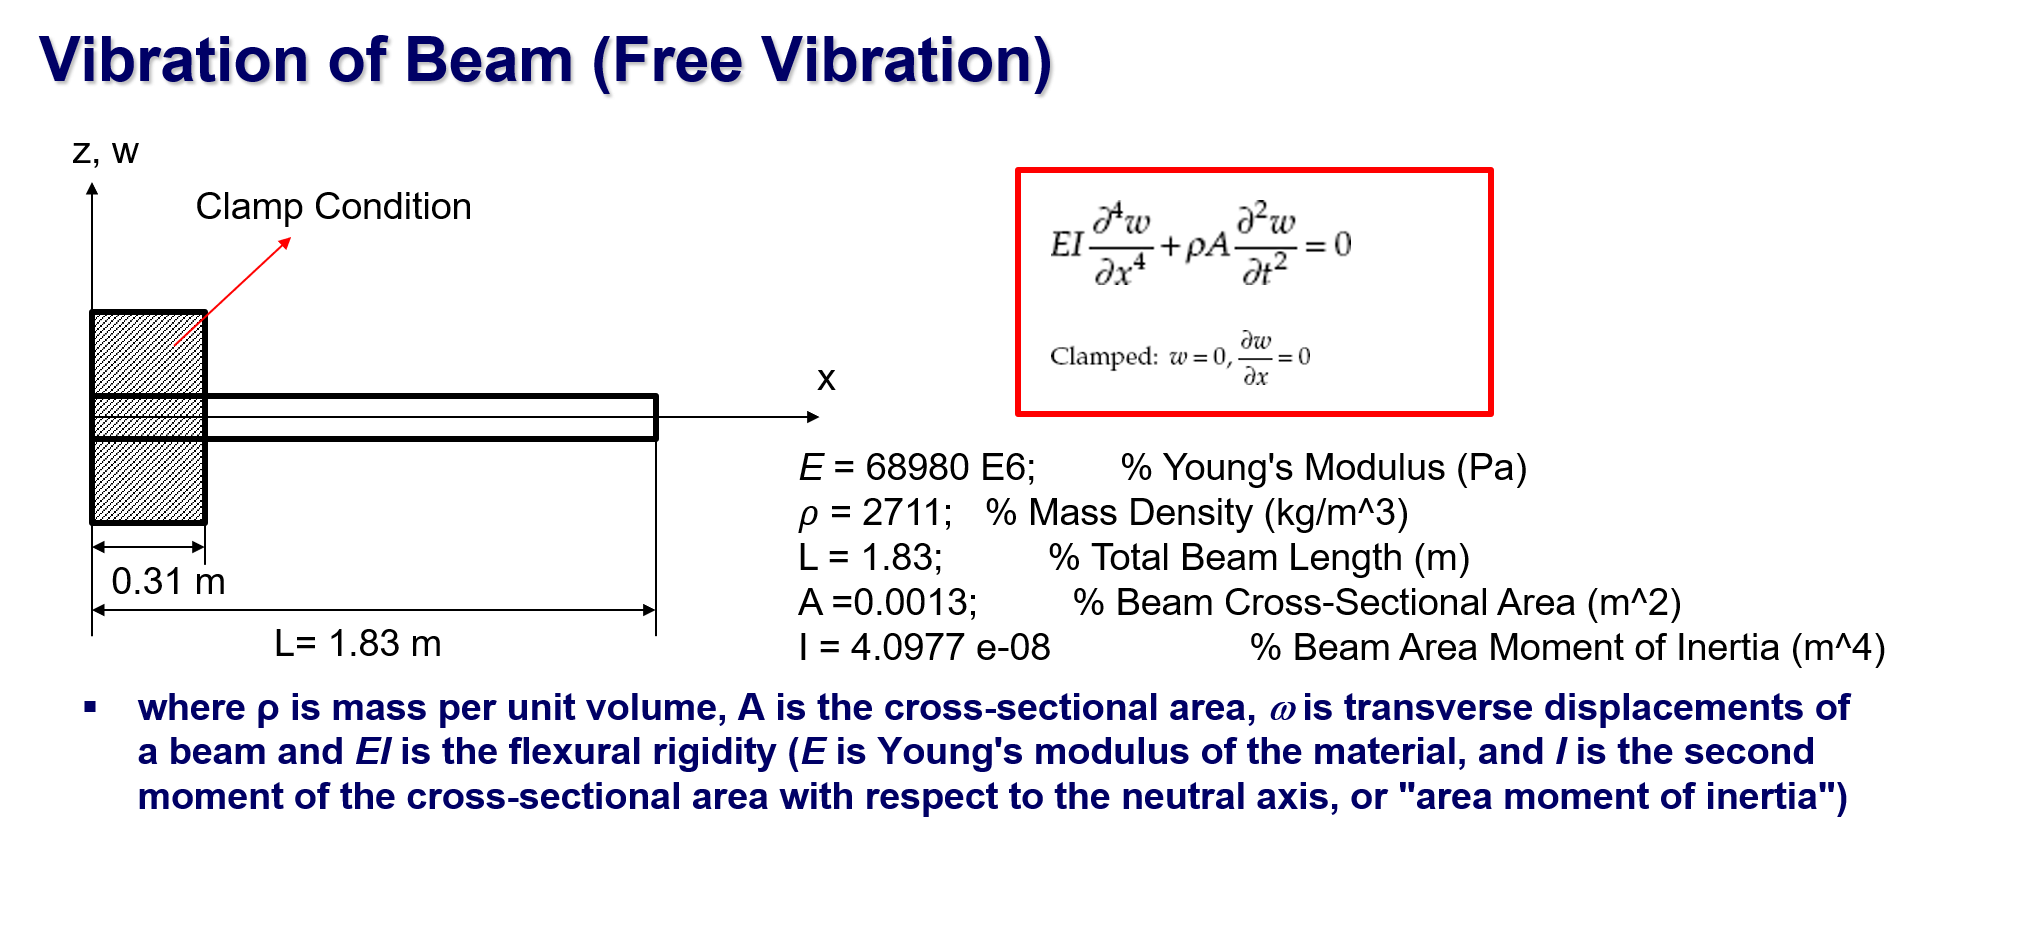

#Setting up /understanding the NN 
The first step is to construct the approximation space.

The independent variables are: (t,x)

The field variable is: w(t, x)

The neural network approximation is defined as: 
$\hat{x}: (t, w) \mapsto \mathcal{N}_u(t,w; \mathbf{W}, \mathcal{b})$


We are Using 8 hidden Layers with 20 Neural units and hyperbolic - tangent activation function 

**WHY DONT WE JUST USE RELU OR SOMETHING SIMILAR (DERIVATIONable)**



In [5]:
x = sn.Variable('x')
t = sn.Variable('t')
w = sn.Functional('w', [t,x], 8*[20], 'tanh')

#Setting up optimazation problem: 

The second step is to set up the optimization model using SciModel interface. Input variables are (t,x) 

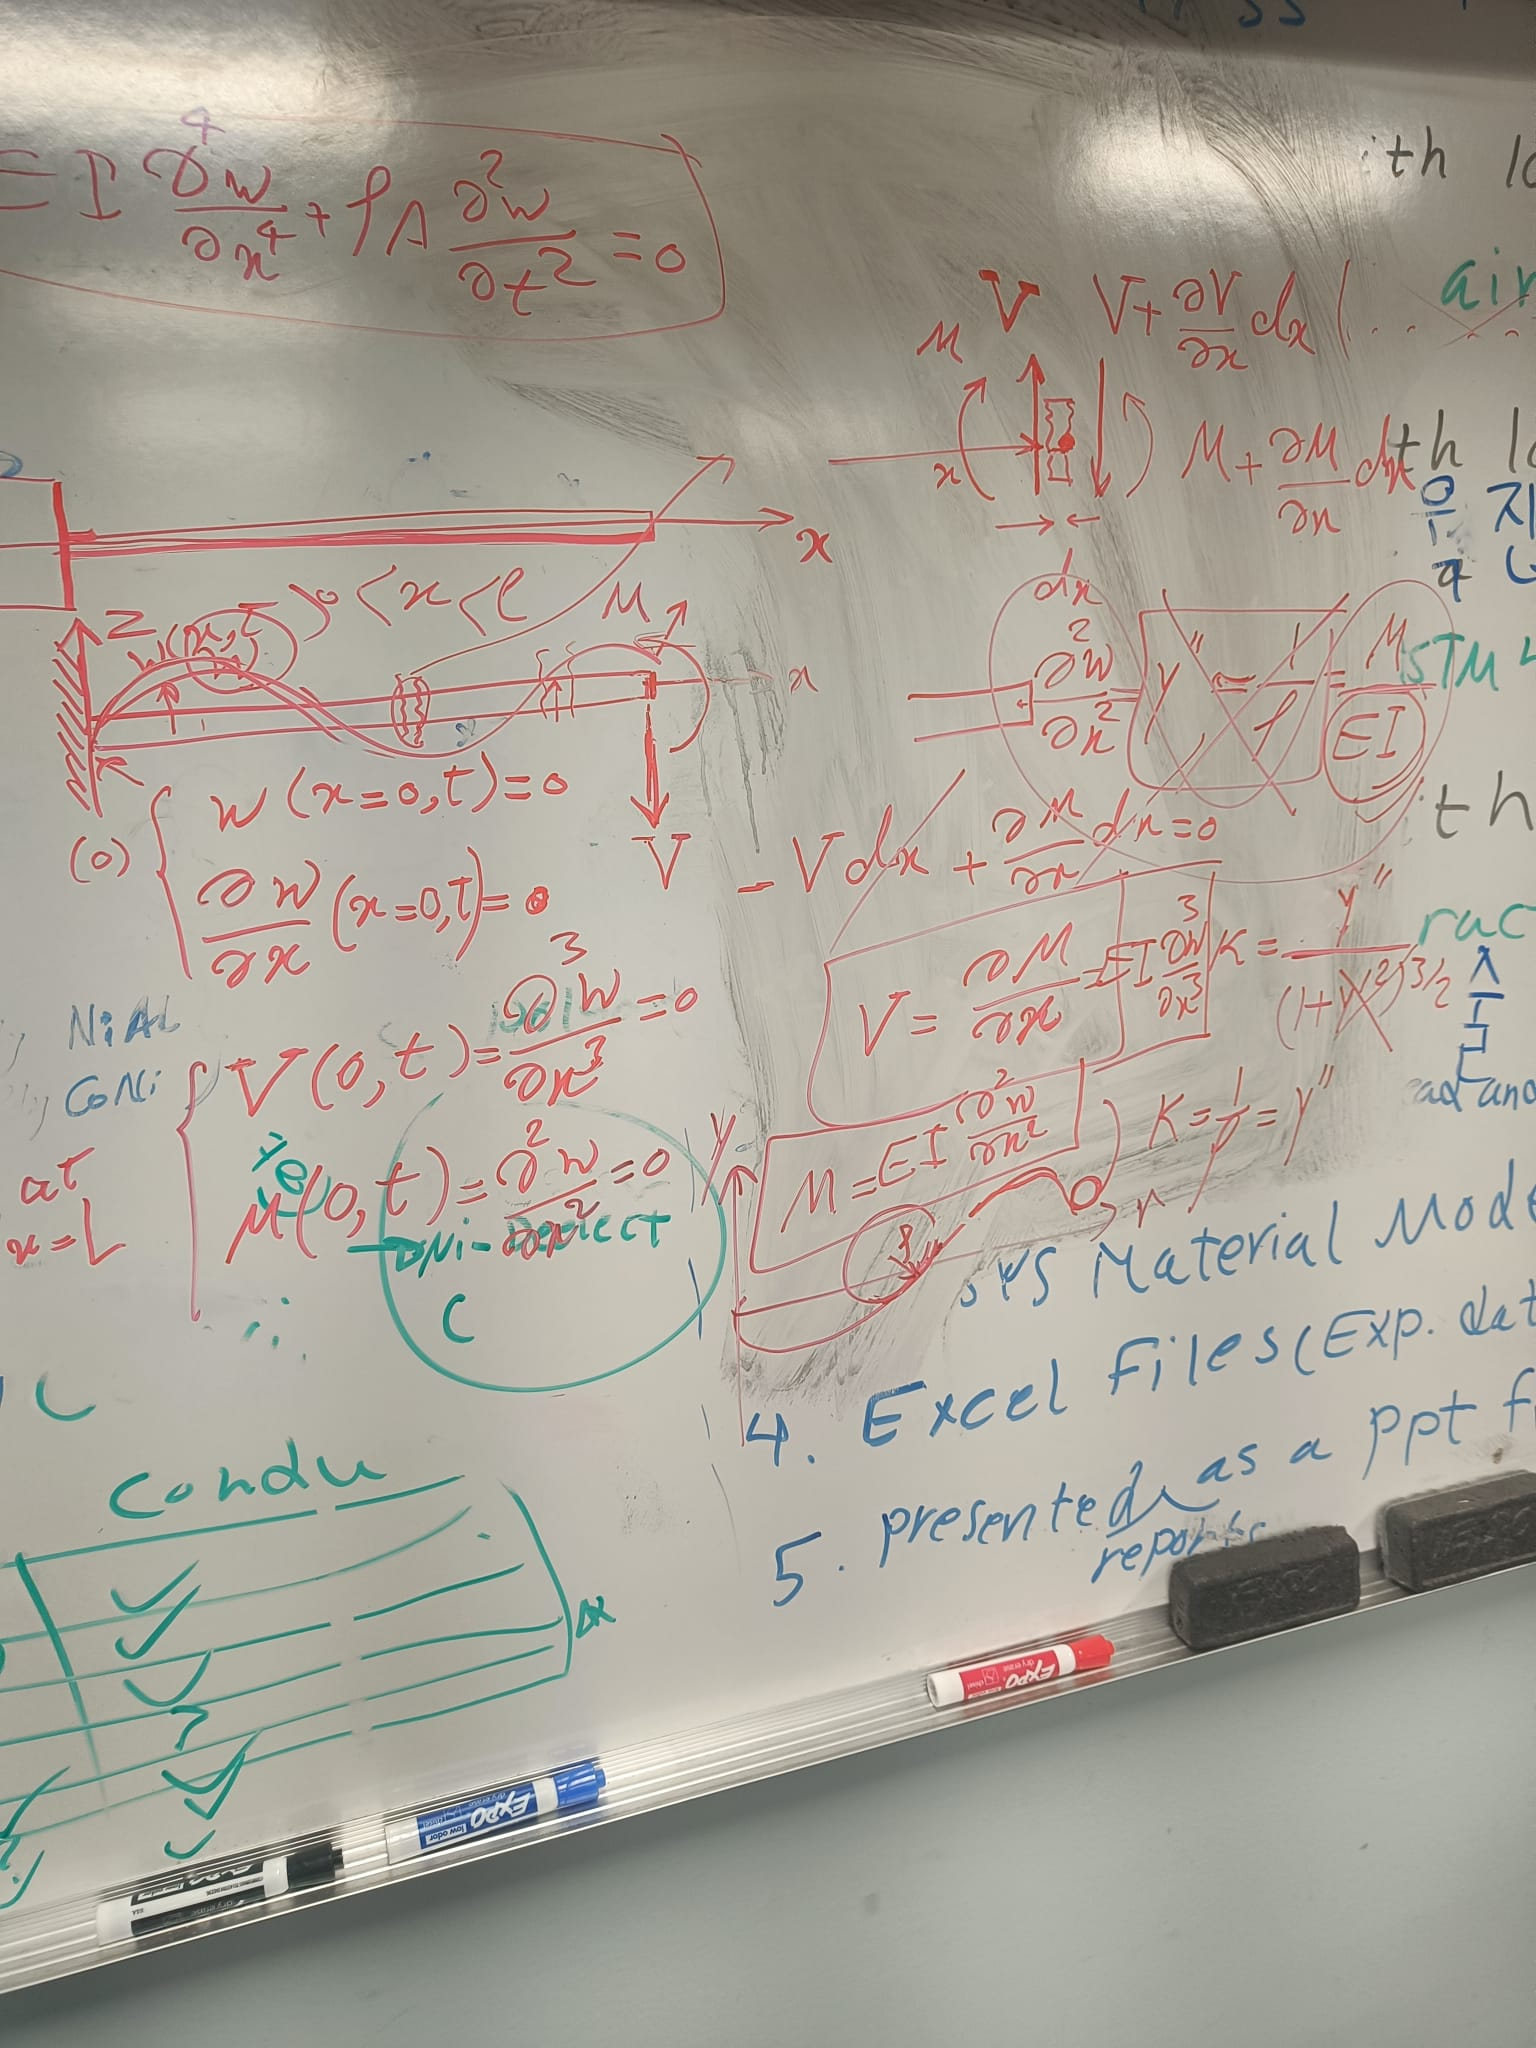

So with the help of Rasul I got the following boundary conditions: 
I am clamped at the left side: (lets take: $l_0=l-0.31m$, the clamp possition)

$w(x=l_0,t)=0$

$ \frac{\partial w}{\partial x}(x=l_0,t)=0$

So now we have the Problem that we need to do this again for the right side: 

$v(l,t)=\frac{\partial^3 w}{\partial x^3}=0$

$M(l,t)=\frac{\partial^2 w}{\partial x^2}=0$

In [11]:
# Parameters:
E=68980*(10**6)  #Young Modules (PA)
p=2711 # Mass density (kg/m^3)
L=1.83 # Beam lenght (m)
A=0.0013# Beam cross Section Area (m^2)
I= 4.0977 *10**(-8) #Beam Are Moment of Inertia (m^4)

## Equation
L1=E*I*diff(w,x,order=4)+p*A*diff(w,t,oder=2)

#Using the sciann diff funktion. ATTENTION: WERE IS THE DOCUMENTATION OF THIS FUNKTION

#Boundary Conditions:


#Inital conditions: ?


#defining the SciModel with multiple objects: 
m = sn.SciModel([x, t], [L1,w])

#Sampling grid 
To train the network, we need to define a sampling (collocation) grid.

USING NUMPY

In [12]:
x_data, t_data = np.meshgrid(
    np.linspace(0, 10, 100), 
    np.linspace(0, 1, 100)
)


#Training

An alternative approach to define the boundary conditions in SciANN is to define the
target in the sn.SciModel as the variable of interest and pass the ‘ids’ of training data
where the conditions should be imposed. This is achieved as:

m . train (
 [ x_data , t_data ] ,
 [ ’ zeros ’ , ( ids_ic_bc , U_ic_bc ) ] ,
 batch_size =256 , epochs =10000)


In [13]:
h = m.train([x_data, t_data], 4*['zero'], learning_rate=0.02, epochs=50, verbose=0)

AssertionError: ignored

In [ ]:
x_test, t_test = np.meshgrid(
    np.linspace(-1, 1, 200), 
    np.linspace(0, 1, 200)
)
u_pred = u.eval(m, [x_test, t_test])



In [ ]:
fig = plt.figure(figsize=(3, 4))
plt.pcolor(x_test, t_test, u_pred, cmap='seismic')
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()